## SHAP: SHapley Additive exPlanations

SHAP (SHapley Additive exPlanations) is another popular method for explaining machine learning models. It provides a unified measure of feature importance and can be used for both classification and regression models. Below is an example of how to use SHAP with a RandomForestClassifier for the binary classification problem.

In this code:

* We set a binary threshold on the median of y to create a binary classification target variable y_binary, where data points with y values above the median are labeled as 1 (high risk), and data points below or equal to the median are labeled as 0 (low risk).

* We train a Gradient Boosting Classifier on the modified target variable y_binary.

* We calculate the accuracy score on the test data to evaluate the classifier's performance.

* We create a SHAP explainer using shap.explainer and provide the model and training data.

* We choose a prediction to explain (e.g., the first test data point), and we use explainer.shap_values to compute the SHAP values for that prediction.

* We visualize the SHAP values using shap.summary_plot to see the impact of each feature on the prediction.



In [1]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/55/d5/0a1c65b13ab5a24178d162d0cfd3f8a709588388cc5bdd32b17c119f6d54/shap-0.44.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 8.2 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap

In [3]:
random_state = 42

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Create and fit the Random Forest Classifier model with two classes (0 and 1)
# We are now using the original regression target variable y
model = GradientBoostingClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, (y_train > np.median(y)).astype(int))  # Use binary target variable here

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# Calculate accuracy score
accuracy = accuracy_score((y_test > np.median(y)).astype(int), y_pred)  # Use binary target variable here
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.7191011235955056


In [4]:
# The kernel explainer receives the function that predicts the probability of classes and the train set as its main inputs.
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Computing the SHAP values using on the samples in the test set.
shap_values = explainer(X_test)

# get just the explanations for the positive class
shap_values = shap_values[..., 1]

Using 353 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/89 [00:00<?, ?it/s]

We can use a bar plot for plotting the mean absolute value of the SHAP values each feature to provide a global explanation of the model.

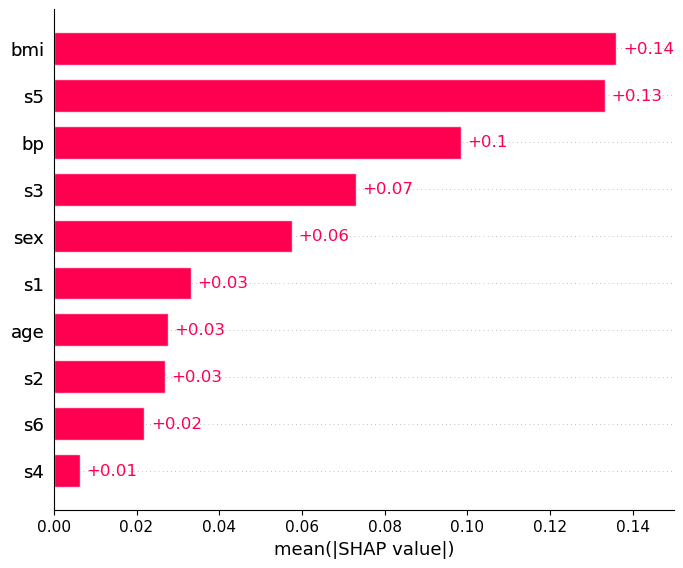

In [5]:
shap.plots.bar(shap_values)

We can use waterfall plot to illustrate the contribution of each feature in pushing the model output for a specific sample from the base value (the average model output over the training dataset we passed). Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 

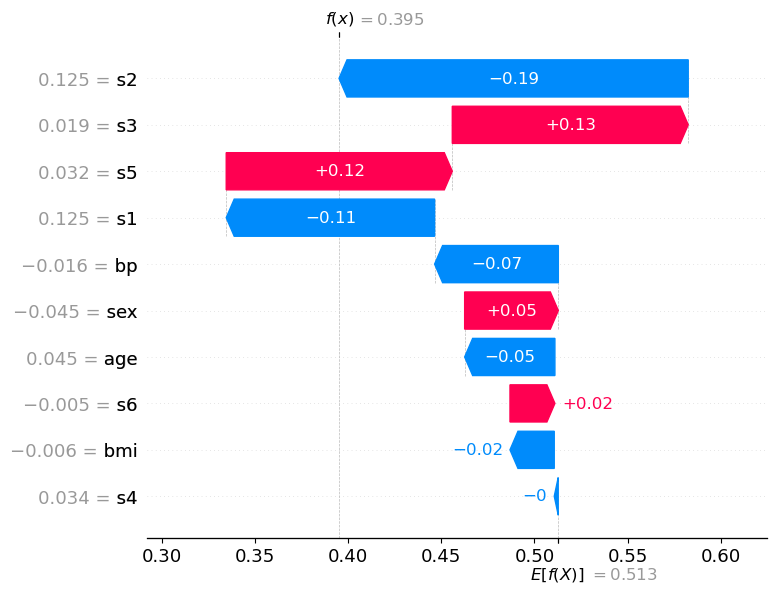

In [6]:
sample_id = 0
shap.plots.waterfall(shap_values[sample_id])